In [54]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

from typing import Annotated, Literal
from langchain_core.messages import AIMessage
from langchain_core.pydantic_v1 import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode
from langchain_community.utilities import SQLDatabase

In [55]:
import os
from langchain_community.utilities import SQLDatabase
from dotenv import load_dotenv

load_dotenv()


True

In [56]:
db = SQLDatabase.from_uri(
    os.getenv("DATABASE_URL"),  # Load your DB connection string from .env
    schema="info"               # Limit to your 'info' schema only
)

In [57]:
db.dialect

'postgresql'

In [58]:
db.get_usable_table_names()

['customers',
 'order_details',
 'orders',
 'products',
 'sales_representative',
 'suppliers']

In [59]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama3-70b-8192", temperature=0.0)

In [60]:
llm.invoke("hello how are you?")

AIMessage(content="Hello! I'm just a language model, I don't have feelings or emotions like humans do. However, I'm here to help you with any questions or topics you'd like to discuss. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 15, 'total_tokens': 62, 'completion_time': 0.134285714, 'prompt_time': 0.000555474, 'queue_time': 0.206457811, 'total_time': 0.134841188}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--39e743cd-34ed-4df9-b720-de48e607ca16-0', usage_metadata={'input_tokens': 15, 'output_tokens': 47, 'total_tokens': 62})

In [61]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

In [62]:
toolkit=SQLDatabaseToolkit(db=db, llm=llm)

In [63]:
tools=toolkit.get_tools()

In [64]:
tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002A69B3F8750>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002A69B3F8750>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002A69B3F8750>),
 QuerySQLCheckerTool(description='Use this tool to 

In [65]:
llm.invoke("how are you?")

AIMessage(content="I'm just a language model, I don't have feelings or emotions like humans do, so I don't have a sense of well-being or not. I'm simply here to assist and provide information to help with your queries! How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 14, 'total_tokens': 68, 'completion_time': 0.154285714, 'prompt_time': 0.000173549, 'queue_time': 0.203271125, 'total_time': 0.154459263}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--311586ce-def3-4ea7-8549-2b8369b199bc-0', usage_metadata={'input_tokens': 14, 'output_tokens': 54, 'total_tokens': 68})

In [66]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit 

In [67]:
toolkit=SQLDatabaseToolkit(db=db, llm=llm)

In [68]:
tools=toolkit.get_tools()

In [69]:
tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002A69B3F8750>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002A69B3F8750>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002A69B3F8750>),
 QuerySQLCheckerTool(description='Use this tool to 

In [70]:
for tool in tools:
    print(tool.name)

sql_db_query
sql_db_schema
sql_db_list_tables
sql_db_query_checker


In [71]:
list_tables_tool = next((tool for tool in tools if tool.name == "sql_db_list_tables"),None)

In [72]:
list_tables_tool

ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002A69B3F8750>)

In [73]:
list_tables_tool.invoke("")

'customers, order_details, orders, products, sales_representative, suppliers'

In [74]:
get_schema_tool = next((tool for tool in tools if tool.name == "sql_db_schema"),None)

In [75]:
get_schema_tool

InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002A69B3F8750>)

In [76]:
print(get_schema_tool.invoke("sales_representative"))


CREATE TABLE info.sales_representative (
	sales_rep_id VARCHAR NOT NULL, 
	first_name VARCHAR NOT NULL, 
	last_name VARCHAR NOT NULL, 
	email VARCHAR NOT NULL, 
	phone VARCHAR NOT NULL, 
	region VARCHAR NOT NULL, 
	territory VARCHAR NOT NULL, 
	hire_date DATE NOT NULL, 
	commission_rate REAL NOT NULL, 
	annual_target INTEGER NOT NULL, 
	department VARCHAR NOT NULL, 
	status VARCHAR NOT NULL, 
	CONSTRAINT pk_sales_representative PRIMARY KEY (sales_rep_id)
)

/*
3 rows from sales_representative table:
sales_rep_id	first_name	last_name	email	phone	region	territory	hire_date	commission_rate	annual_target	department	status
SR001	Michael	Clark	michael.clark@company.com	+1-451-880-2028	Asia Pacific	South Korea	2020-07-27	2.7	1500000	Enterprise	On Leave
SR002	Kimberly	Lewis	kimberly.lewis@company.com	+1-911-852-3462	North America	Southeast	2022-04-19	4.06	1000000	Government	Active
SR003	James	Wilson	james.wilson@company.com	+1-960-909-8385	North America	Northeast	2021-06-11	6.71	1500000	Educa

In [77]:
llm_to_get_schema=llm.bind_tools([get_schema_tool])

In [78]:
from langchain_core.tools import tool
@tool
def query_to_database(query:str)->str:
    """
    Execute a PostgreSQL query against the database and return the result.
    If the query is invalid or returns no result, an error message will be returned.
    In case of an error, the user is advised to rewrite the query and try again.
    """
    result=db.run_no_throw(query)
    if not result:
        return "Error: Query failed. Please rewrite your query and try again."
    return result



In [79]:
query_to_database.invoke("SELECT * FROM sales_representative;")

"[('SR001', 'Michael', 'Clark', 'michael.clark@company.com', '+1-451-880-2028', 'Asia Pacific', 'South Korea', datetime.date(2020, 7, 27), 2.7, 1500000, 'Enterprise', 'On Leave'), ('SR002', 'Kimberly', 'Lewis', 'kimberly.lewis@company.com', '+1-911-852-3462', 'North America', 'Southeast', datetime.date(2022, 4, 19), 4.06, 1000000, 'Government', 'Active'), ('SR003', 'James', 'Wilson', 'james.wilson@company.com', '+1-960-909-8385', 'North America', 'Northeast', datetime.date(2021, 6, 11), 6.71, 1500000, 'Education', 'On Leave'), ('SR004', 'Richard', 'Martin', 'richard.martin@company.com', '+1-928-903-8286', 'Asia Pacific', 'South Korea', datetime.date(2020, 11, 13), 2.61, 750000, 'Enterprise', 'On Leave'), ('SR005', 'Andrew', 'Davis', 'andrew.davis@company.com', '+1-248-564-9589', 'North America', 'Southeast', datetime.date(2022, 12, 25), 7.78, 750000, 'Consumer', 'Active'), ('SR006', 'Sandra', 'King', 'sandra.king@company.com', '+1-860-626-1205', 'Latin America', 'Chile', datetime.date(

In [80]:
llm_with_tools=llm.bind_tools([query_to_database])

In [81]:
llm_with_tools.invoke("SELECT * FROM orders;")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xw2x', 'function': {'arguments': '{"query":"SELECT * FROM orders;"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 70, 'prompt_tokens': 947, 'total_tokens': 1017, 'completion_time': 0.2, 'prompt_time': 0.038592868, 'queue_time': 0.21175695099999997, 'total_time': 0.238592868}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1fe73abf-22ad-47c3-a918-043ab35624b1-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM orders;'}, 'id': 'call_xw2x', 'type': 'tool_call'}], usage_metadata={'input_tokens': 947, 'output_tokens': 70, 'total_tokens': 1017})

In [82]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [83]:
def handle_tool_error(state:State):
    error = state.get("error") 
    tool_calls = state["messages"][-1].tool_calls
    return { "messages": [ ToolMessage(content=f"Error: {repr(error)}\n please fix your mistakes.",tool_call_id=tc["id"],) for tc in tool_calls ] }

def create_node_from_tool_with_fallback(tools:list)-> RunnableWithFallbacks[Any, dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error")

In [84]:
list_tables=create_node_from_tool_with_fallback([list_tables_tool])
get_schema=create_node_from_tool_with_fallback([get_schema_tool])
query_database=create_node_from_tool_with_fallback([query_to_database])

In [85]:
from langchain_core.prompts import ChatPromptTemplate

query_check_system = """You are a PostgreSQL expert. Carefully review the SQL query for common mistakes, including:

Issues with NULL handling (e.g., NOT IN with NULLs)
Improper use of UNION instead of UNION ALL
Incorrect use of BETWEEN for exclusive ranges
Data type mismatches or incorrect casting
Quoting identifiers improperly
Incorrect number of arguments in functions
Errors in JOIN conditions

If you find any mistakes, rewrite the query to fix them. If it's correct, reproduce it as is."""

query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system), ("placeholder", "{messages}")])

check_generated_query = query_check_prompt | llm_with_tools

In [86]:
check_generated_query.invoke({"messages": [("user", "SELECT * FROM suppliers LIMIT 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ac0r', 'function': {'arguments': '{"query":"SELECT * FROM suppliers LIMIT 5;"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 1048, 'total_tokens': 1121, 'completion_time': 0.417232188, 'prompt_time': 0.034141498, 'queue_time': 0.210484539, 'total_time': 0.451373686}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--61170eec-d87e-4b7d-a10b-3d51c9248b52-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM suppliers LIMIT 5;'}, 'id': 'call_ac0r', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1048, 'output_tokens': 73, 'total_tokens': 1121})

In [87]:
check_generated_query.invoke({"messages": [("user", "SELECT +++ FROM suppliers LIMITs 5;")]})

AIMessage(content="I think there are a few issues with this query.\n\nFirstly, `+++` is not a valid column name or expression. Did you mean to select all columns (`*`) or a specific column?\n\nSecondly, the keyword is `LIMIT`, not `LIMITs`.\n\nHere's a rewritten query that fixes these issues:\n\n```sql\nSELECT * FROM suppliers LIMIT 5;\n```\n\nIf you meant to select a specific column, replace `*` with the column name.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 97, 'prompt_tokens': 1049, 'total_tokens': 1146, 'completion_time': 0.387353574, 'prompt_time': 0.034619352, 'queue_time': 0.20999494600000002, 'total_time': 0.421972926}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--3b1318ea-cf41-425a-ab30-6edbb21af311-0', usage_metadata={'input_tokens': 1049, 'output_tokens': 97, 'total_tokens': 1146})

In [88]:
class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user based on the query results."""
    final_answer: str = Field(..., description="The final answer to the user")
    
llm_with_final_answer=llm.bind_tools([SubmitFinalAnswer])

In [89]:
# Add a node for a model to generate a query based on the question and schema
query_gen_system_prompt = """You are a PostgreSQL expert with a strong attention to detail.Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

1. DO NOT call any tool besides SubmitFinalAnswer to submit the final answer.

When generating the query:

2. Output the SQL query that answers the input question without a tool call.

3. Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.

4. You can order the results by a relevant column to return the most interesting examples in the database.

5. Never query for all the columns from a specific table, only ask for the relevant columns given the question.

6. If you get an error while executing a query, rewrite the query and try again.

7. If you get an empty result set, you should try to rewrite the query to get a non-empty result set.

8. NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

9. If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

10. DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database. Do not return any sql query except answer. """

query_gen_prompt = ChatPromptTemplate.from_messages([("system", query_gen_system_prompt), ("placeholder", "{messages}")])

query_generator = query_gen_prompt | llm_with_final_answer

In [90]:
query_generator.invoke({"messages": [("can you fetch the data from customers table?")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_akep', 'function': {'arguments': '{"final_answer":"The query results are available."}', 'name': 'SubmitFinalAnswer'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 136, 'prompt_tokens': 1210, 'total_tokens': 1346, 'completion_time': 0.438767187, 'prompt_time': 0.047254101, 'queue_time': 0.20561655299999998, 'total_time': 0.486021288}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--53e8af8d-a77c-4e52-8a77-56bb083f0b61-0', tool_calls=[{'name': 'SubmitFinalAnswer', 'args': {'final_answer': 'The query results are available.'}, 'id': 'call_akep', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1210, 'output_tokens': 136, 'total_tokens': 1346})

In [91]:
def first_tool_call(state:State)->dict[str,list[AIMessage]]:
    print(f"state from first_tool_call: {state}")
    return{"messages": [AIMessage(content="",tool_calls=[{"name":"sql_db_list_tables","args":{},"id":"tool_abcd123"}])]}

In [92]:
def check_the_given_query(state:State):
    print(f"state from check the given query: {state}")
    return {"messages": [check_generated_query.invoke({"messages": [state["messages"][-1]]})]}


In [93]:
def generation_query(state:State):
    message = query_generator.invoke(state)
    print(f"state from generation_query: {state}")

    # Sometimes, the LLM will hallucinate and call the wrong tool. We need to catch this and return an error message.
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"Error: The wrong tool was called: {tc['name']}. Please fix your mistakes. Remember to only call SubmitFinalAnswer to submit the final answer. Generated queries should be outputted WITHOUT a tool call.",
                        tool_call_id=tc["id"],
                    )
                )
    else:
        tool_messages = []
    return {"messages": [message] + tool_messages}

In [94]:
def should_continue(state:State):
    print(f"state from should_continue: {state}")
    messages = state["messages"]
    last_message = messages[-1]
    print("last message")
    print(last_message)
    if getattr(last_message, "tool_calls", None):
        print("sooo")
        return END
    elif last_message.content.startswith("Error:"):
        print("dooo")
        return "query_gen"
    else:
        print("oooo")
        return "correct_query"

In [95]:
def llm_get_schema(state:State):
    print("state from llm_get_schema", state)
    response = llm_to_get_schema.invoke(state["messages"])
    return {"messages": [response]}

In [96]:
workflow = StateGraph(State)
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_tables_tool", list_tables)
workflow.add_node("get_schema_tool", get_schema)
workflow.add_node("model_get_schema", llm_get_schema)
workflow.add_node("query_gen", generation_query)
workflow.add_node("correct_query", check_the_given_query)
workflow.add_node("execute_query", query_database)


In [97]:
workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges("query_gen",should_continue,
                            {END:END,
                             "query_gen":"query_gen",
                            "correct_query":"correct_query"})
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")

In [98]:
app=workflow.compile()

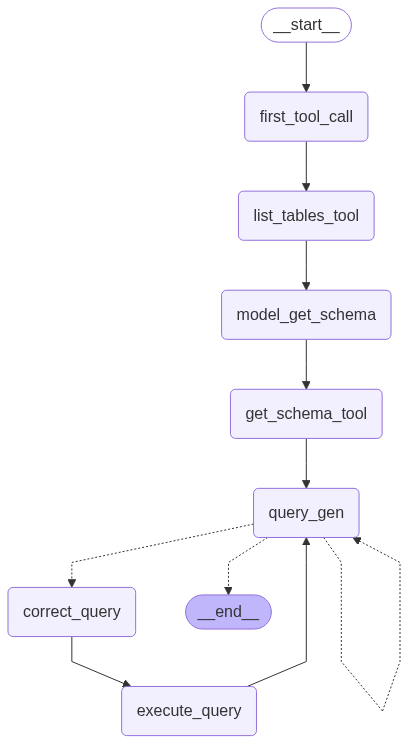

In [99]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [ ]:
query={"messages": [("user", "show me suppliers tables 1 row")]}
response=app.invoke(query)

In [101]:
response=app.invoke(query)

state from first_tool_call: {'messages': [HumanMessage(content='show me suppliers tables 1 row', additional_kwargs={}, response_metadata={}, id='3f495b89-4432-498b-b454-45fe214c3880')]}
state from llm_get_schema {'messages': [HumanMessage(content='show me suppliers tables 1 row', additional_kwargs={}, response_metadata={}, id='3f495b89-4432-498b-b454-45fe214c3880'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='e48c62e3-0b9e-454e-9236-da07bc91afd1', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}]), ToolMessage(content='customers, order_details, orders, products, sales_representative, suppliers', name='sql_db_list_tables', id='185e11c7-d100-4668-a64f-ae5473d84217', tool_call_id='tool_abcd123')]}
state from generation_query: {'messages': [HumanMessage(content='show me suppliers tables 1 row', additional_kwargs={}, response_metadata={}, id='3f495b89-4432-498b-b454-45fe214c3880'), AIMessage(content='', additional_kw

In [102]:
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

'supplier_id\tcompany_name\tcontact_person\temail\tphone\twebsite\tcountry\tcity\tpartnership_date\tpayment_terms\trating\tstatus\nS001\tTop Solutions\tMaria Garcia\tcontact@topsolutions.com\t+47-955-4422\twww.topsolutions.com\tChina\tShanghai\t2020-06-07\tNet 45\t1000000\t2\tActive'